In [14]:
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumGothic')

from sklearn import datasets

df = pd.read_csv("final_clusters.csv", index_col=0)
df = df.drop(columns='역개수')

df.head()

,자치구,노인인구수,무료급식소개수,시설개수,평균소득
0,종로구,27704,5,8,5500.653548
1,중구,24660,2,11,5987.035233
2,용산구,38478,3,7,5550.348108
3,성동구,47530,5,19,4731.800000
4,광진구,53737,2,22,5643.548667


<Axes: >

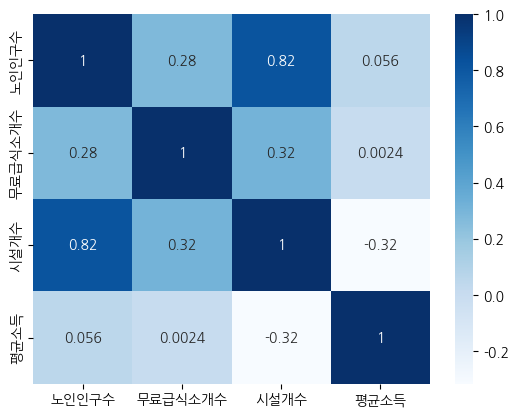

In [15]:
# 상관관계 분석

dfX = df.drop(columns='자치구')

sns.heatmap(dfX.corr() , annot=True, cmap='Blues')

In [2]:
#Equalization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled = sc.fit_transform(df.drop(columns="자치구"))
df_sc = pd.DataFrame(scaled)

C:\Users\1119h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1119h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\1119h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1119h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

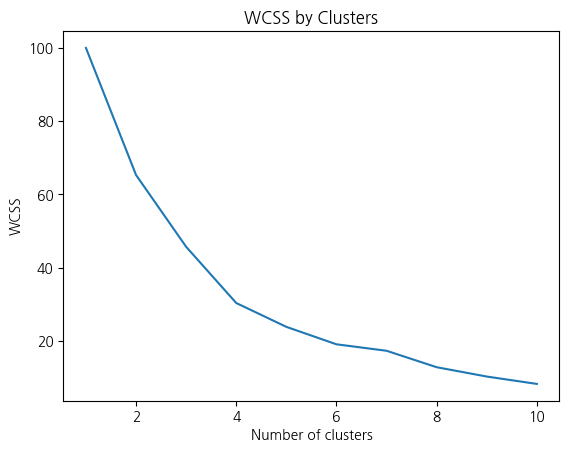

In [17]:
from sklearn.cluster import KMeans

%matplotlib inline

X = pd.DataFrame(scaled)

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(X.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)

#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_sc.values, i) for i in range(df_sc.shape[1])]
vif["features"] = df_sc.columns
vif

,VIF Factor,features
0,4.627405,0
1,1.734824,1
2,1.256775,2
3,5.562569,3
4,2.646586,4


In [18]:
#K-Means Clustering
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3,random_state=0)

# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(X)

# Assign the cluster
X_withCluster = df.copy()
X_withCluster['km_clusters'] = km_clusters

C:\Users\1119h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1119h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram

clusters_single = linkage(y=scaled, method='single',metric='euclidean' )
clusters_average = linkage(y=scaled, method='average',metric='euclidean' )
clusters_complete = linkage(y=scaled, method='complete',metric='euclidean' )

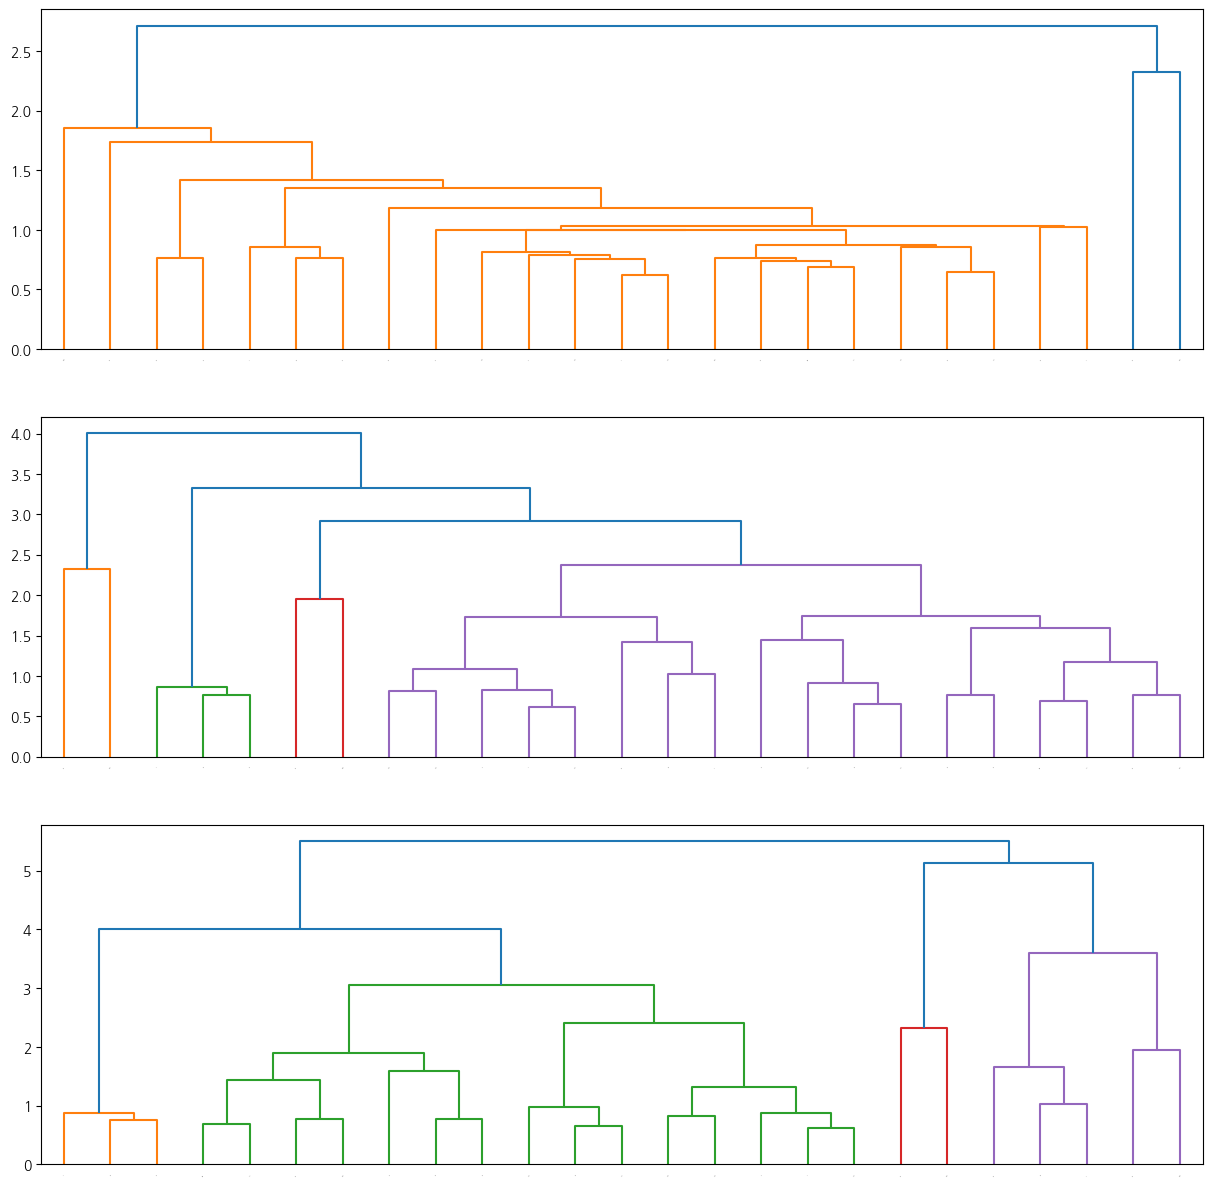

In [20]:
fig, axes = plt.subplots(3,1)
fig.set_size_inches(15,15)

ax1 = dendrogram(clusters_single, leaf_font_size=0, ax=axes[0])
ax2 = dendrogram(clusters_average, leaf_font_size=0, ax=axes[1])
ax3 = dendrogram(clusters_complete, leaf_font_size=0, ax=axes[2])

In [21]:
#Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=4, linkage='average')
agg_clusters = agg_model.fit_predict(X)

X_withCluster['agg_clusters'] = agg_clusters
X_withCluster

,자치구,노인인구수,무료급식소개수,시설개수,평균소득,km_clusters,agg_clusters
0,종로구,27704,5,8,5500.653548,1,2
1,중구,24660,2,11,5987.035233,1,2
2,용산구,38478,3,7,5550.348108,1,2
3,성동구,47530,5,19,4731.800000,1,0
4,광진구,53737,2,22,5643.548667,1,0
5,동대문구,64255,2,35,3750.812000,0,0
6,중랑구,74790,11,48,3855.080000,0,0
7,성북구,77293,11,28,3950.206275,0,0
8,강북구,66170,11,35,3587.515714,0,0
9,도봉구,66942,0,29,3728.169286,1,0


In [22]:
#PCA

from sklearn.decomposition import PCA
X = scaled.copy()

pca = PCA(n_components=2)

pca.fit(X)
x_pca = pca.transform(X)

#to DataFrame
pca_df = pd.DataFrame(x_pca)
pca_df['km_clusters'] = X_withCluster['km_clusters']
pca_df['agg_clusters'] = X_withCluster['agg_clusters']
pca_df.head()

,0,1,km_clusters,agg_clusters
0,2.552675,-0.219282,1,2
1,2.802628,-0.308599,1,2
2,2.473332,-0.214967,1,2
3,1.199490,-0.482720,1,0
4,1.193980,-0.272292,1,0


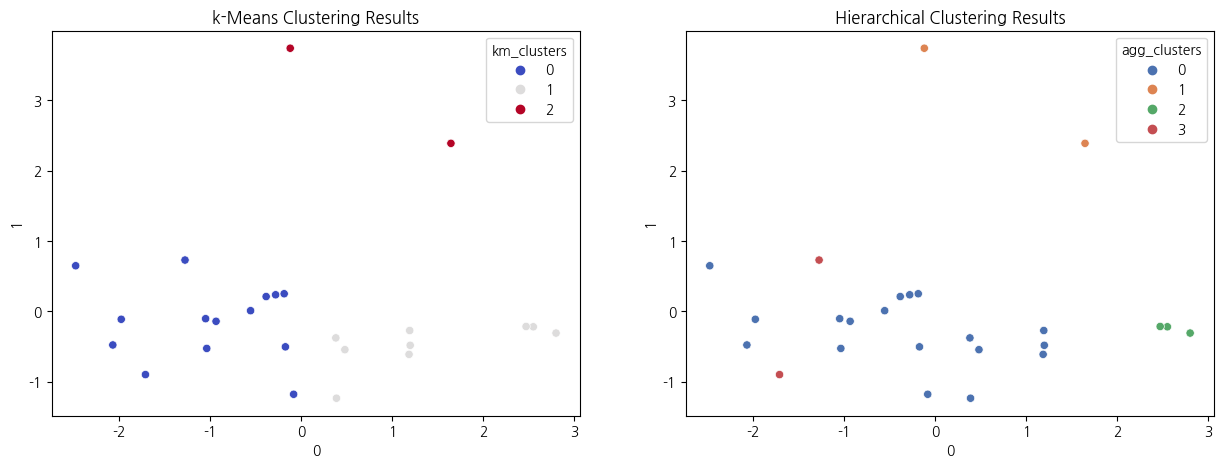

In [23]:
#Visualization

import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.scatterplot(x=0, y=1, data=pca_df, hue='km_clusters', palette='coolwarm', ax=ax[0])
sns.scatterplot(x=0, y=1, data=pca_df, hue='agg_clusters', palette='deep', ax=ax[1])

ax[0].set(title='k-Means Clustering Results')
ax[1].set(title='Hierarchical Clustering Results')

plt.show()

In [41]:
X_withCluster.to_csv("cluster_label.csv", index = False)